In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

In [2]:
def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'], columns=ds['feature_names'])
    code_species_map = dict(zip(range(3), ds['target_names']))
    df['species'] = [code_species_map[c] for c in ds['target']]
    return df

In [3]:
df = get_iris_df()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
plt.title('Desgloce por ' + var, fontsize=25)
plt.savefig('grafico_sectores_iris_una_variable.jpg')
plt.close()

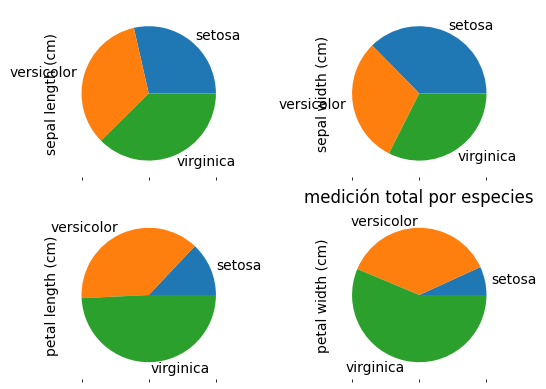

In [5]:
sum_by_species = df.groupby('species').sum()
sum_by_species.plot(kind='pie', subplots=True, layout=(2,2), legend=False)
plt.title('medición total por especies')
plt.show()

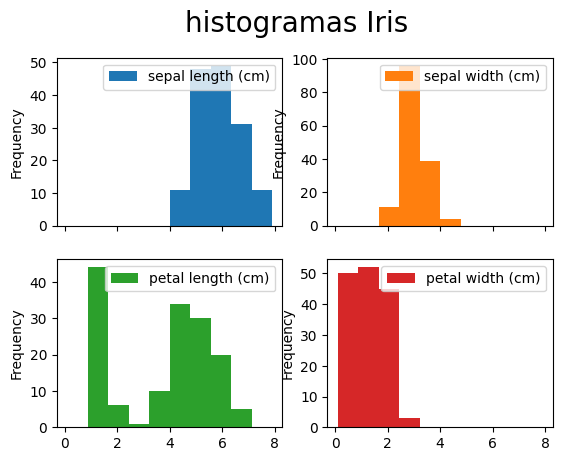

In [6]:
df.plot(kind='hist', subplots=True, layout=(2,2))
plt.suptitle("histogramas Iris", fontsize=20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

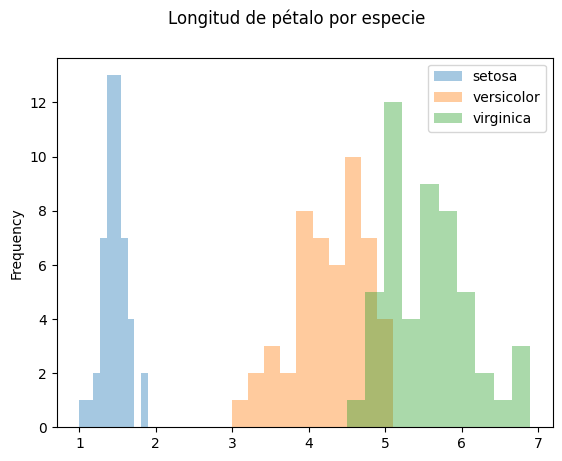

In [7]:
for spec in df['species'].unique():
    forspec = df[df['species'] == spec]
    forspec["petal length (cm)"].plot(kind='hist', 
                                      alpha=0.4, 
                                      label=spec)

plt.legend(loc='upper right')
plt.suptitle('Longitud de pétalo por especie')
plt.show

In [8]:
col = df["petal length (cm)"]
promedio = col.mean()
std = col.std()
# mediana = col.median()
Q2 = col.quantile(0.5)
Q3 = col.quantile(0.75)
Q1 = col.quantile(0.25)
media_limpia = col[(col>Q1)&(col<Q3)].mean()
print(f"Q1: {Q1}")
print(f"Q2: {Q2}")
print(f"Q3: {Q3}")
print(f"Desviación: {std}")
print(f"Promedio: {promedio}")
print(f"Promedio limpio: {media_limpia}")

Q1: 1.6
Q2: 4.35
Q3: 5.1
Desviación: 1.7652982332594662
Promedio: 3.7580000000000005
Promedio limpio: 4.0984375


# Grafico BOXPLOT

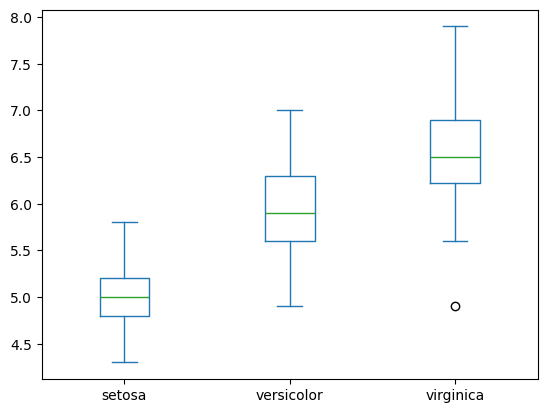

In [9]:
col = 'sepal length (cm)'
df['ind'] = pd.Series(df.index).apply(lambda i: i%50)
df.pivot(index='ind', columns='species')[col].plot(kind='box')
plt.show()

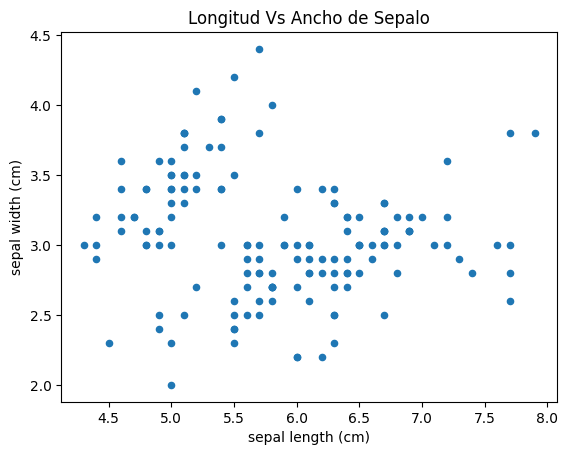

In [10]:
df.plot(kind='scatter', x = 'sepal length (cm)', y = 'sepal width (cm)')
plt.title('Longitud Vs Ancho de Sepalo')
plt.show()

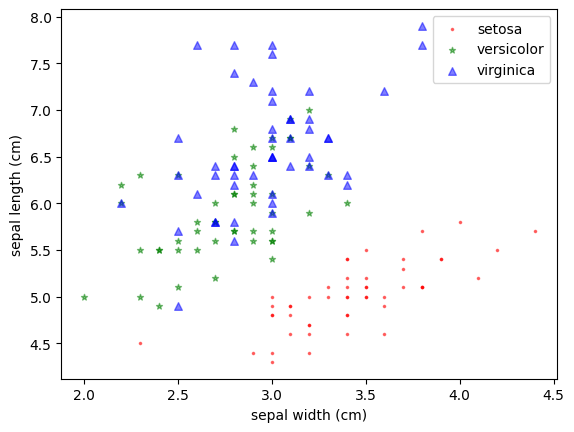

In [11]:
colors = ['r', 'g', 'b']
markers = ['.', '*', '^']
fig, ax1 = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique()):
    ddf = df[df['species']==spec]
    ddf.plot(kind='scatter', x = 'sepal width (cm)', y = 'sepal length (cm)', 
             alpha=0.5, s=10*(i+1), ax=ax1, color=colors[i], marker=markers[i],
            label=spec)
plt.legend()
plt.show()

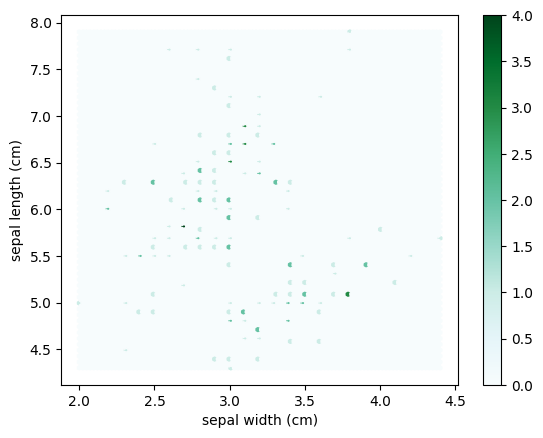

In [12]:
df.plot(kind='hexbin', 
        x='sepal width (cm)', 
        y='sepal length (cm)')
plt.show()

In [20]:
print(df['sepal width (cm)'].corr(df['sepal length (cm)']))

-0.11756978413300198
